In [1]:
import pandas as pd
import numpy as np


In [2]:
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [3]:
from bs4 import BeautifulSoup

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
url = "https://www.google.com/flights/explore/#explore;f=IAD,DCA,BWI;t=r-Central+America-0x8f0b58c0f7680811%253A0x8dace0c7060b2570;li=3;lx=5;d=2018-05-11"
htmlString = '<html><body><div style="background-color:red;height:500px;width:500px;">This is a png</div></body></html>'
driver = webdriver.PhantomJS()


D:\Users\awjessu\AppData\Local\Continuum\anaconda3\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [14]:
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.139 Safari/537.36")
driver = webdriver.PhantomJS(desired_capabilities=dcap,service_args=['--ignore-ssl-errors=true'])
driver.execute_script("document.write('{}');".format(htmlString))  # changing the DOM
driver.implicitly_wait(25)
driver.get(url)


D:\Users\awjessu\AppData\Local\Continuum\anaconda3\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [15]:
driver.save_screenshot(r'flightScreenShot3.png')

True

In [16]:
#s = BeautifulSoup(driver.page_source,"lxml'")
s = BeautifulSoup(driver.page_source, 'html.parser')

In [17]:
best_price_tags = s.find_all('div','CTPFVNB-w-e') 
best_prices = []
for tag in best_price_tags:
    best_prices.append(int(tag.text.replace('$','').replace(',','')))

In [18]:
best_prices

[215, 262, 262, 292, 322, 340, 366, 375, 389, 403, 407, 447]

In [19]:
best_price_tags

[<div class="CTPFVNB-w-e" style="top: 49.79109495908428px;">$215</div>,
 <div class="CTPFVNB-w-e" style="top: 43.73094170403587px;">$262</div>,
 <div class="CTPFVNB-w-e" style="top: 52.93011790334601px;">$262</div>,
 <div class="CTPFVNB-w-e" style="top: 29.638244172811397px;">$292</div>,
 <div class="CTPFVNB-w-e" style="top: 33.52130980442122px;">$322</div>,
 <div class="CTPFVNB-w-e" style="top: 50.21052631578948px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 18.96194674343289px;">$366</div>,
 <div class="CTPFVNB-w-e" style="top: 28.36328125px;">$375</div>,
 <div class="CTPFVNB-w-e" style="top: 24.232665394402034px;">$389</div>,
 <div class="CTPFVNB-w-e" style="top: 24.977185083869983px;">$403</div>,
 <div class="CTPFVNB-w-e" style="top: 17.72059576734752px;">$407</div>,
 <div class="CTPFVNB-w-e" style="top: 22.748943661971836px;">$447</div>]

In [20]:
best_price=best_prices[0]

In [21]:
best_price

215

In [22]:
best_height_tags = s.find_all('div','CTPFVNB-w-f')
best_height_tags

[<div class="CTPFVNB-w-x CTPFVNB-w-f CTPFVNB-w-M" style="left: 48px; height: 56.20890504091572px;"></div>,
 <div class="CTPFVNB-w-x CTPFVNB-w-f" style="left: 150px; height: 62.26905829596413px;"></div>,
 <div class="CTPFVNB-w-x CTPFVNB-w-f CTPFVNB-w-M" style="left: 6px; height: 53.06988209665399px;"></div>,
 <div class="CTPFVNB-w-x CTPFVNB-w-f CTPFVNB-w-M" style="left: 6px; height: 76.3617558271886px;"></div>,
 <div class="CTPFVNB-w-x CTPFVNB-w-f" style="left: 126px; height: 72.47869019557878px;"></div>,
 <div class="CTPFVNB-w-x CTPFVNB-w-f" style="left: 144px; height: 55.78947368421052px;"></div>,
 <div class="CTPFVNB-w-x CTPFVNB-w-f" style="left: 60px; height: 87.03805325656711px;"></div>,
 <div class="CTPFVNB-w-x CTPFVNB-w-f" style="left: 0px; height: 77.63671875px;"></div>,
 <div class="CTPFVNB-w-x CTPFVNB-w-f" style="left: 150px; height: 81.76733460559797px;"></div>,
 <div class="CTPFVNB-w-x CTPFVNB-w-f" style="left: 60px; height: 81.02281491613002px;"></div>,
 <div class="CTPFVNB

In [23]:
best_heights= []
for t in best_height_tags:
    best_heights.append(float(t.attrs['style'].split('height:')[1].replace('px;','')))

In [24]:
best_height=best_heights[0]

In [25]:
best_height

56.20890504091572

In [26]:
pph = np.array(best_price)/np.array(best_height)

In [27]:
pph

3.8250166916344788

In [32]:
cities = s.find_all('div', 'CTPFVNB-w-o')

In [33]:
cities


[<div class="CTPFVNB-w-o CTPFVNB-w-b"><div class="CTPFVNB-w-x" style="left: 0px; height: 77.83134317288437px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 6px; height: 69.31182476699053px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 12px; height: 69.31182476699053px;"></div><div class="CTPFVNB-w-x" style="left: 18px; height: 69.31182476699053px;"></div><div class="CTPFVNB-w-x" style="left: 24px; height: 70.48846695839205px;"></div><div class="CTPFVNB-w-x" style="left: 30px; height: 64.72842344680957px;"></div><div class="CTPFVNB-w-x" style="left: 36px; height: 65.25254023585256px;"></div><div class="CTPFVNB-w-x" style="left: 42px; height: 66.19595045612994px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-f CTPFVNB-w-M" style="left: 48px; height: 56.20890504091572px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 54px; height: 56.20890504091572px;"></div><div class="CTPFVNB-w-x" style="left: 60px; height: 56.20890504091572px;"></div><div class="CTPFVNB-w-x"

In [38]:
hlist=[]
for bar in cities[0]\
        .findAll('div', 'CTPFVNB-w-x'):
        hlist.append(float(bar['style']\
             .split('height: ')[1].replace('px;',''))*pph)
                     

In [39]:
fares = pd.DataFrame(hlist, columns=['price'])
fares


,price
0,297.706187
1,265.118887
2,265.118887
3,265.118887
4,269.619563
5,247.587300
6,249.592056
7,253.200615
8,215.000000
9,215.000000


In [40]:
fares.min()

price    215.0
dtype: float64

In [43]:
fares.describe()

,price
count,60.000000
mean,280.520755
std,45.102309
min,215.000000
25%,246.958308
50%,278.395380
75%,320.878654
max,405.451769


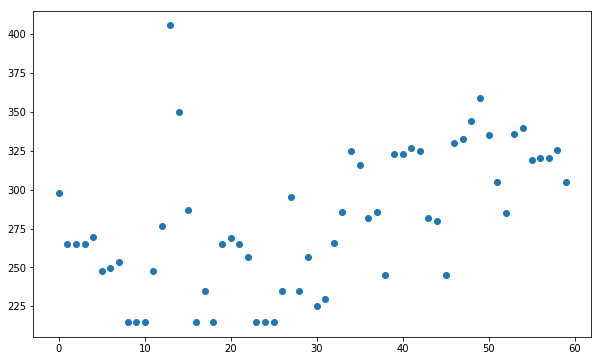

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(fares['price'])),fares['price'])
